In [1]:
import trimesh
import vedo
import numpy as np
from PIL import Image

In [2]:
FILE = r'C:\Users\Almog\Dev\shap-e\project\models\color_blue_shoe_test_output.obj'

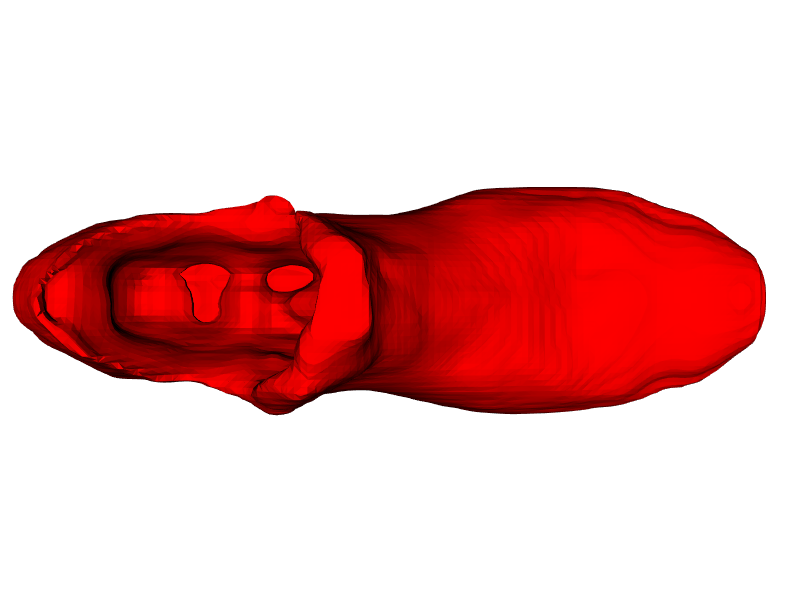

In [2]:
theta = 0
mesh = vedo.Mesh(FILE)
vp = vedo.Plotter(offscreen=False)
vp += mesh

cam = dict(
    position=(-170.906, 79.1394, 15.9800),
    focal_point=(-2.02597, 15.9931, 0.509021),
    viewup=(0.357535, 0.925400, 0.125714),
    distance=180.962,
    clipping_range=(120.677, 257.285),
)

vp.show(camera=cam)

In [3]:
def create_pan_cameras(size):
    origins = []
    xs = []
    ys = []
    zs = []
    for theta in np.linspace(0, 2 * np.pi, num=20):
        z = np.array([np.sin(theta), np.cos(theta), -0.5])
        z /= np.sqrt(np.sum(z**2))
        origin = -z * 4
        x = np.array([np.cos(theta), -np.sin(theta), 0.0])
        y = np.cross(z, x)
        origins.append(origin)
        xs.append(x)
        ys.append(y)
        zs.append(z)
    return origins, xs, ys, zs

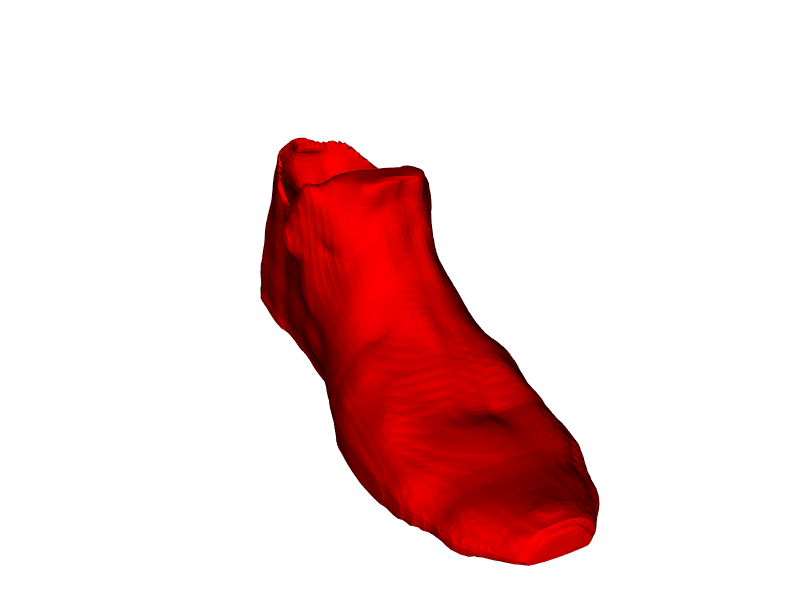

In [65]:
origins, xs, ys, zs = create_pan_cameras(128)
mesh = vedo.Mesh(FILE)
vp = vedo.Plotter(offscreen=False, sharecam=False)
vp += mesh

# Assuming origins, xs, ys, zs are defined as per your camera setup
i = 4
origin = origins[i]
x = xs[i]
y = ys[i]
z = zs[i]

# Calculate focal point (looking direction)
focal_point = origin + z * 10  # Scale z to set how far the camera is looking
render_window_height = 300  # Example height in pixels
viewing_distance = 500      # Example distance in pixels

cam = {
    'pos': origin.tolist(),           
    'focal_point': focal_point.tolist(), 
    'viewup': y.tolist(), 
}
vp.move_camera([cam, cam])
plt = vedo.show(mesh, viewup='z')
# vp.screenshot(f"view_{i}.png") # If you want to save each view

